In [3]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Effet du poids global $W$

Ici, nous étudions l'effet du poids global $W$ sur la sélectivité à l'orientation du ring

Pour cela, nous simulons le réseau pour chaque valeur de $W$ et nous affichons les rasterplots représentant l'activité des neurones des trois populations du modèle.

CSAConnector: libneurosim support not available in NEST.
Falling back on PyNN's default CSAConnector.
Please re-compile NEST using --with-libneurosim=PATH


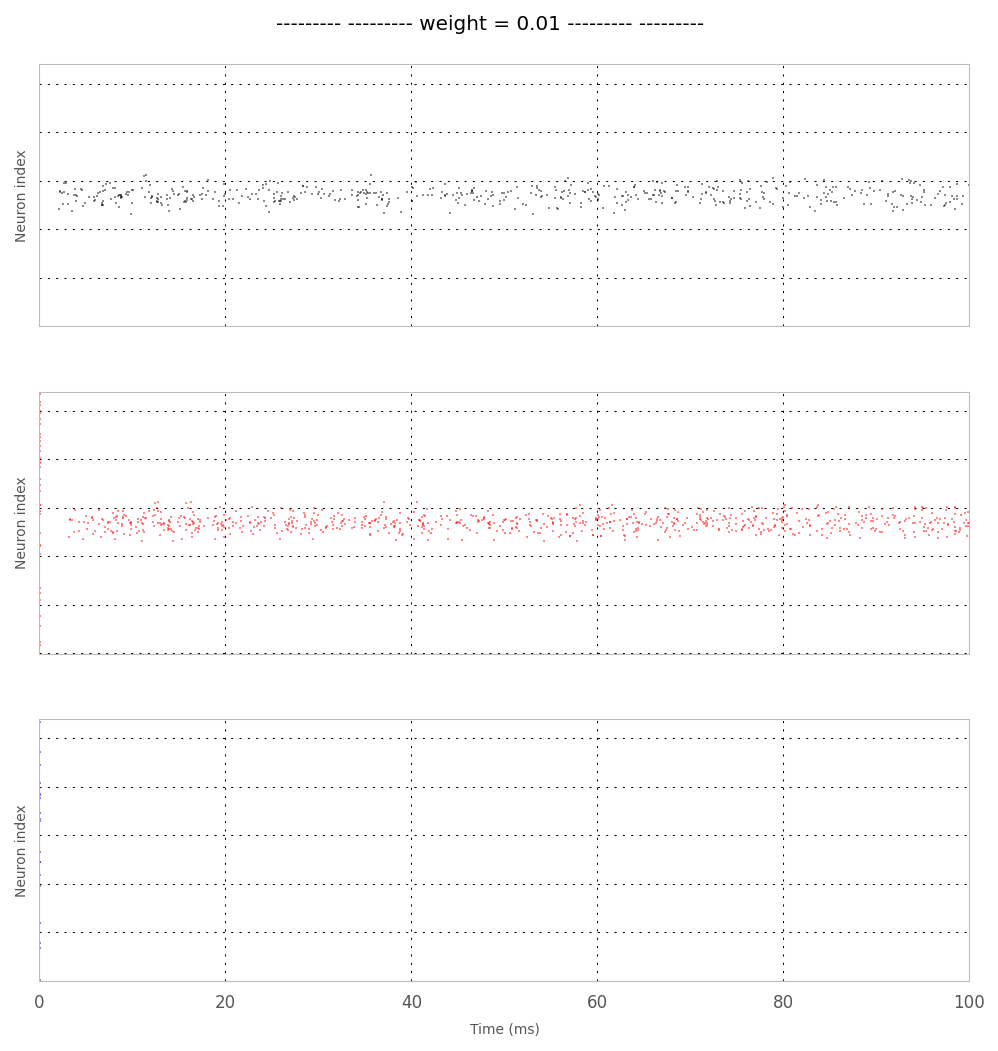

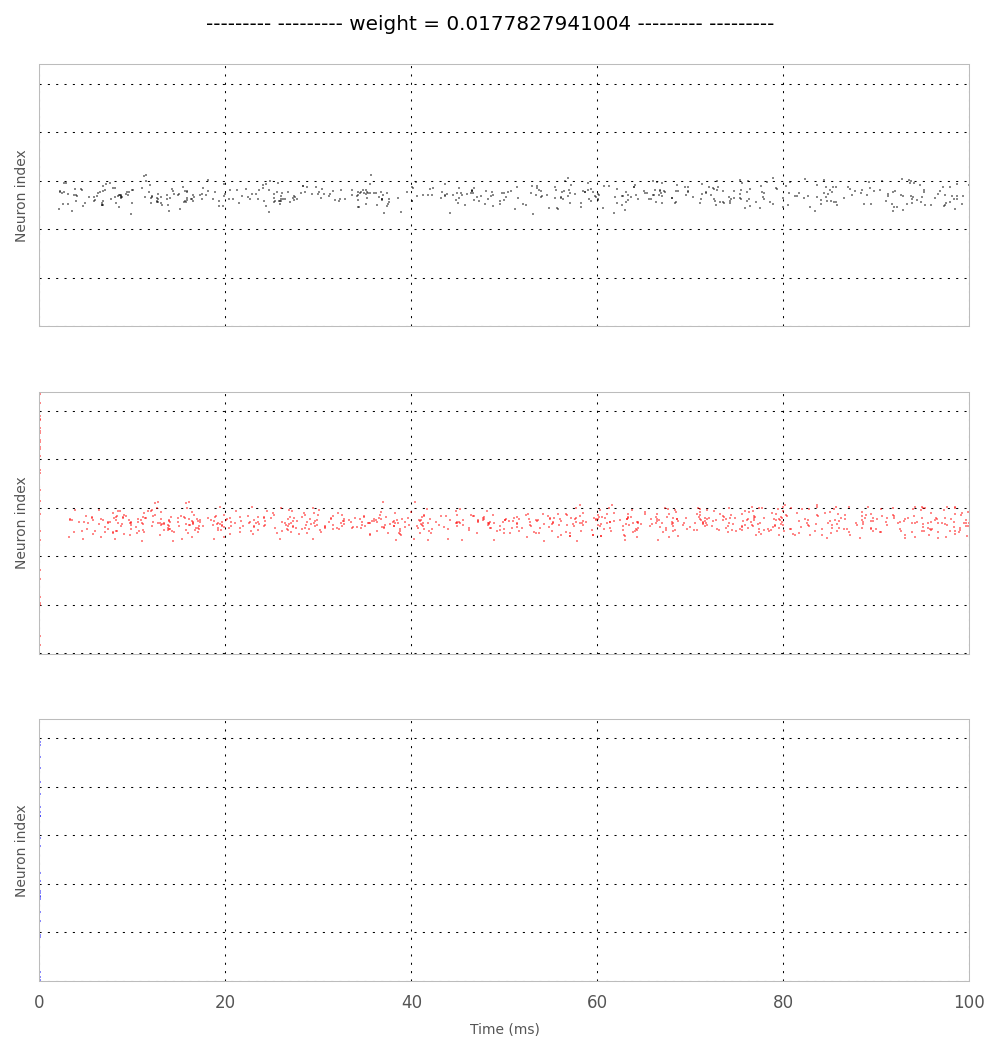

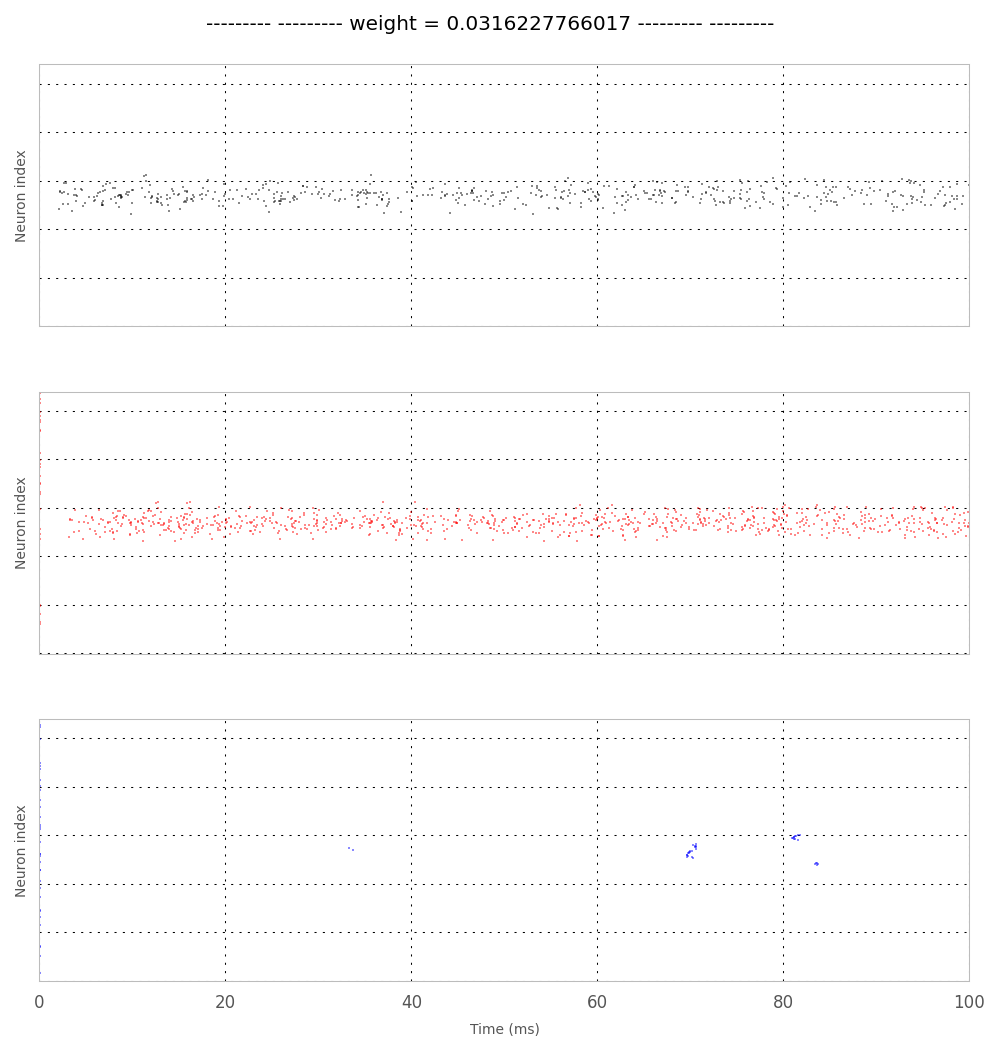

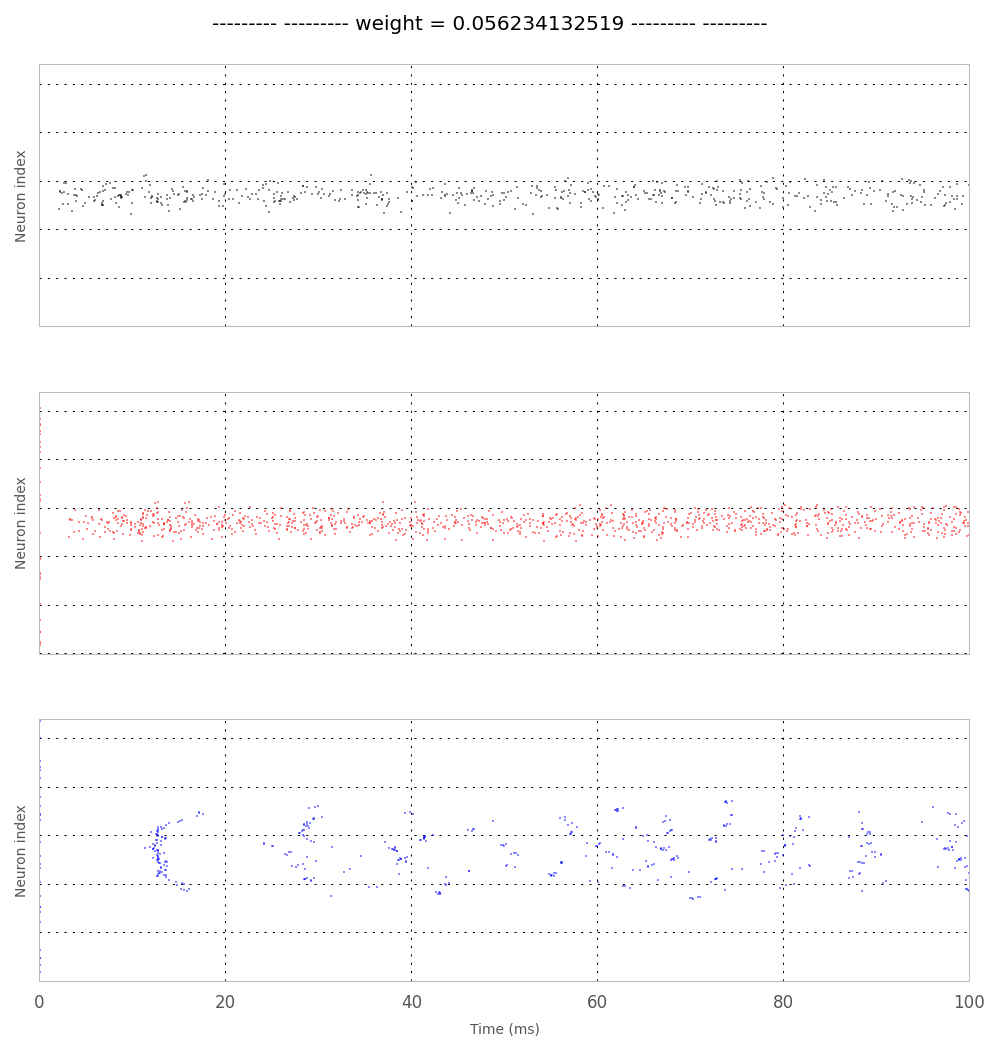

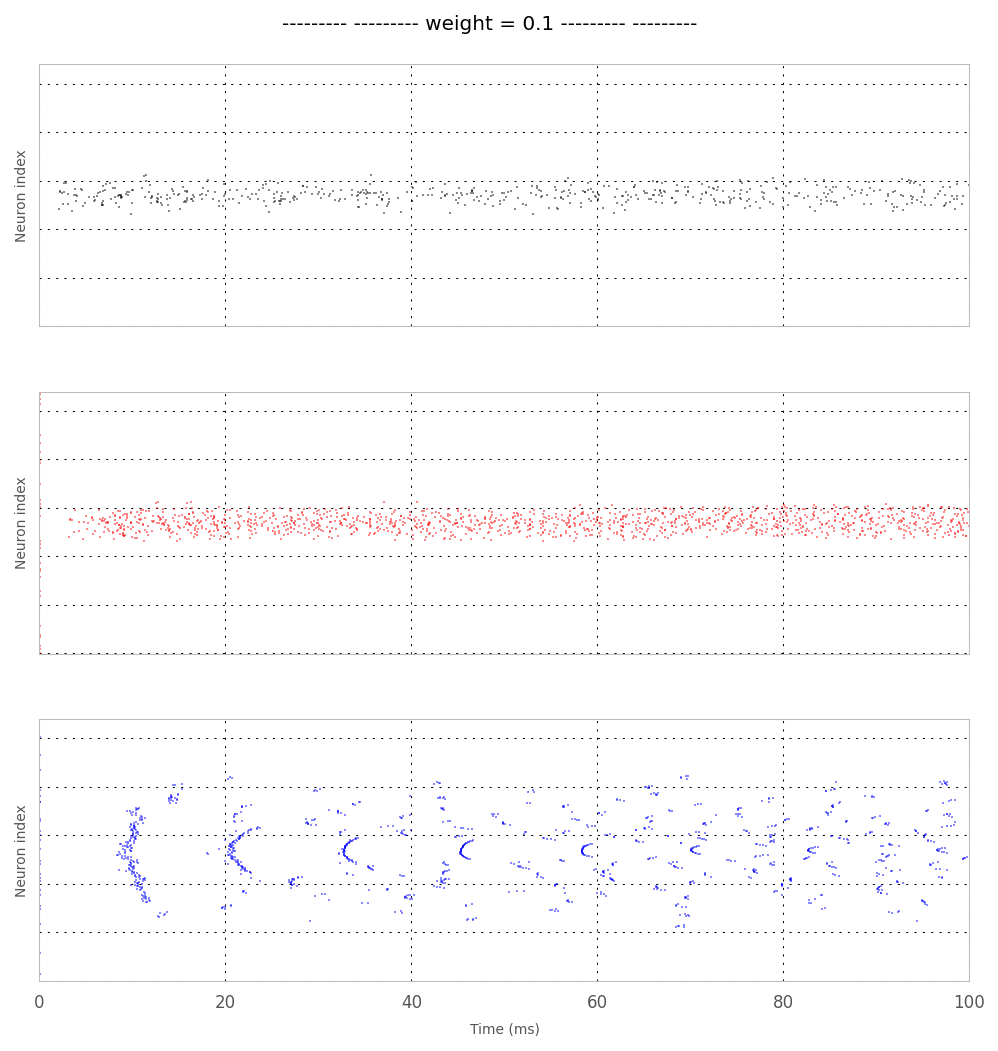

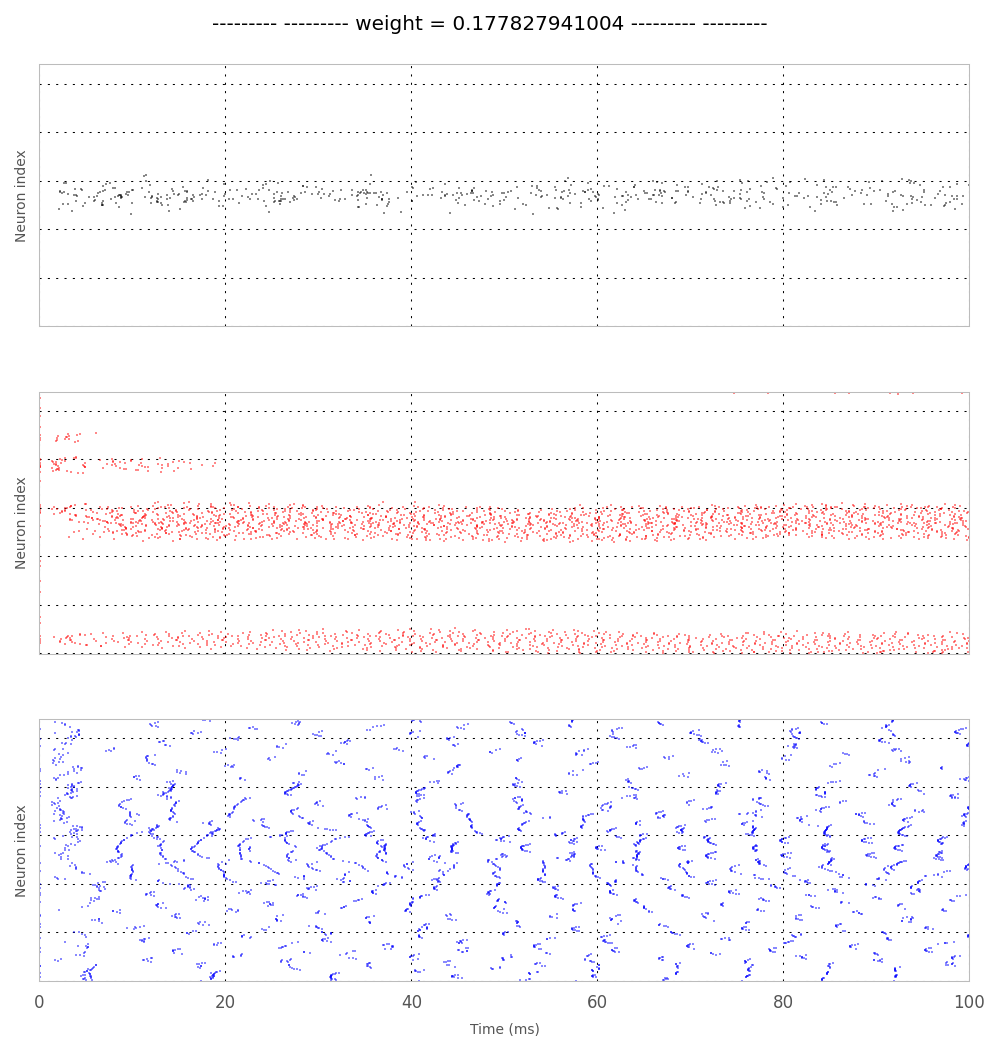

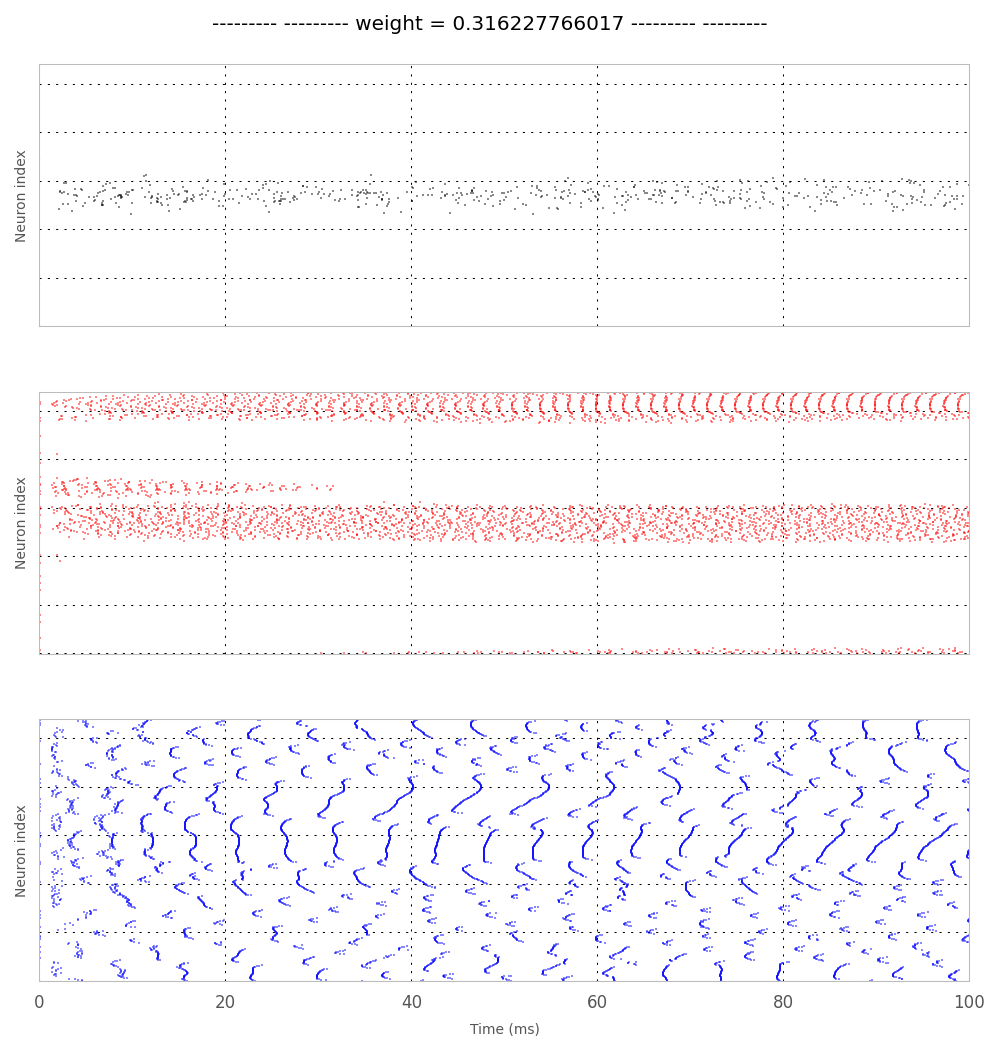

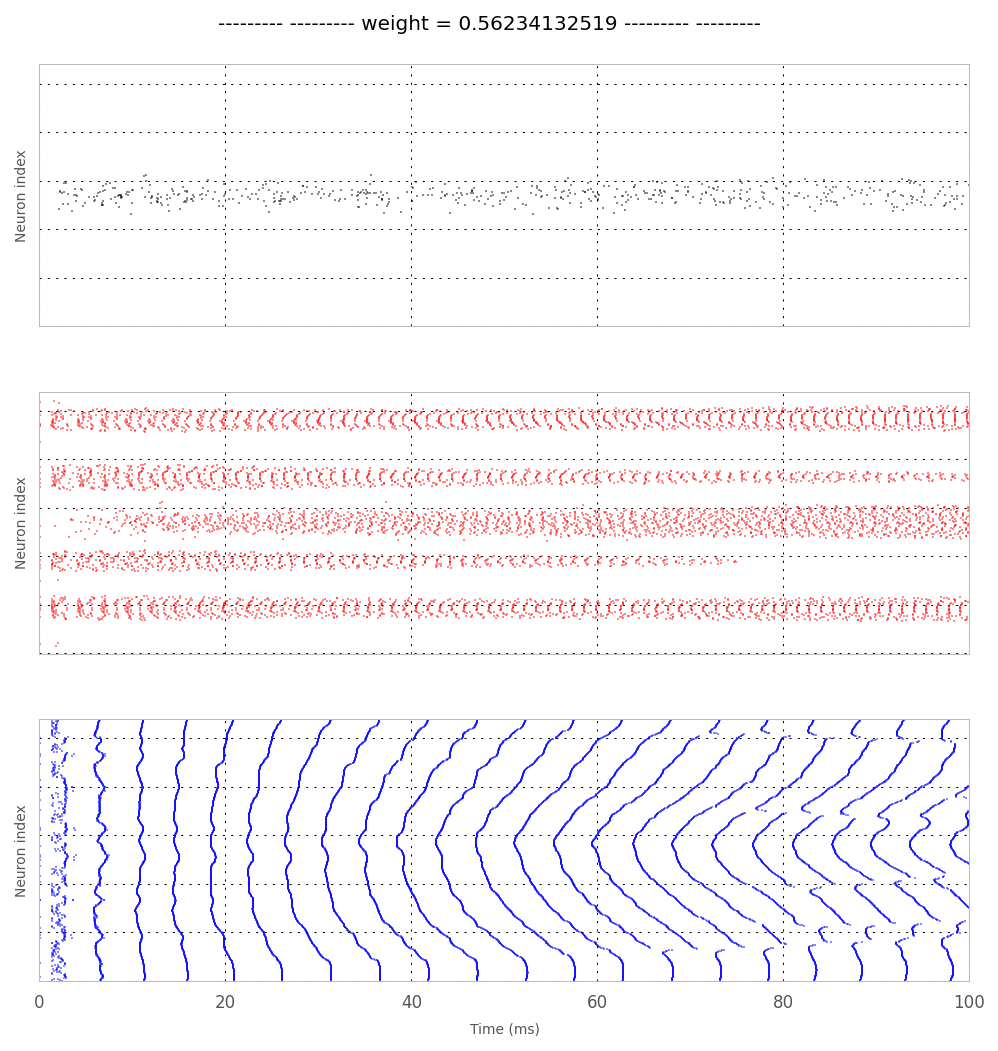

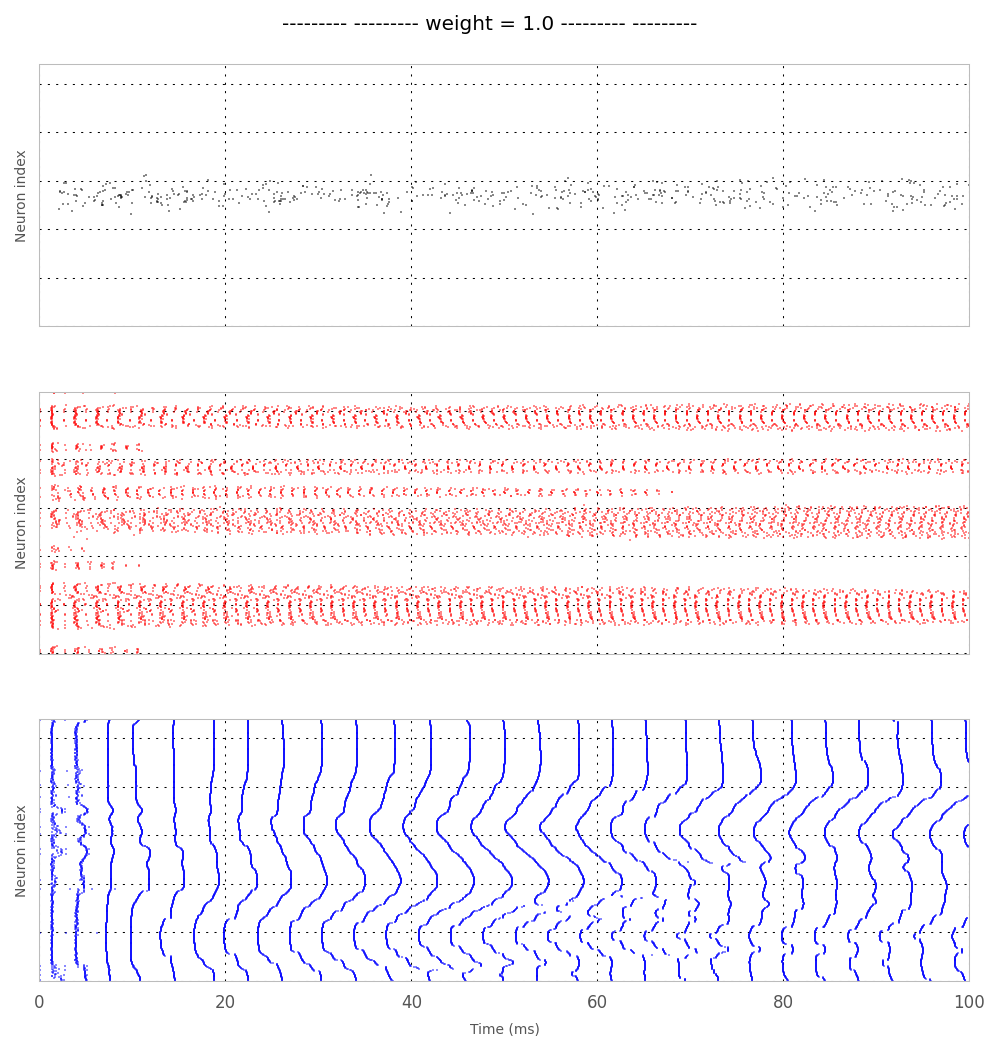

In [4]:
from RRNN import RRNN
from pyNN.utility.plotting import Figure, Panel
markersize = .5

time = 100
net = RRNN()

ws = net.w * np.logspace(-1, 1, 9)
for w in ws:
    fig, ax = plt.subplots(figsize=(8,8))
    net = RRNN(time=time, w=w)

    df, spikesE, spikesI = net.model()
    _ = net.Raster(df, spikesE, spikesI,
                   title='--------- weight = {} ---------'.format(str(w)),
                    markersize=markersize)

    plt.show()